In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup as bsoup

import constants

In [2]:
test_run = True

ukbb_data_file = "small_ukbiobank.csv" if test_run else "ukbiobank.csv"
ukbb_data_path = os.path.join(constants.UK_BIOBANK_DATA_PATH, ukbb_data_file)

ukbb_index_html_path = os.path.join(constants.UK_BIOBANK_DATA_PATH, "ukbiobank.html")
ukbb_index_csv_path = os.path.join(constants.UK_BIOBANK_DATA_PATH, "ukbiobank_index.csv")

In [3]:
if os.path.exists(ukbb_index_csv_path):
    ukbb_index = pd.read_csv(ukbb_index_csv_path)
else:
    ukbb_html = bsoup(open(ukbb_index_html_path,'r').read())
    ukbb_index_html = ukbb_html.find_all("table")[1]
    ukbb_index = pd.read_html(str(ukbb_index_html))[0]
    ukbb_index.columns = [col.lower() for col in ukbb_index.columns]
    ukbb_index.to_csv(ukbb_index_csv_path, index=False)

In [4]:
ukbb_index.head()

,column,udi,count,type,description
0,0,eid,502543,Sequence,Encoded anonymised participant ID
1,1,23-0.0,456606,Categorical (single),Spirometry methodUses data-coding 100270 compr...
2,2,23-1.0,18135,Categorical (single),Spirometry methodUses data-coding 100270 compr...
3,3,23-2.0,26790,Categorical (single),Spirometry methodUses data-coding 100270 compr...
4,4,31-0.0,502543,Categorical (single),SexUses data-coding 9 comprises 2 Integer-valu...


In [29]:
ukbb_data = pd.read_csv(ukbb_data_path, low_memory=False)
ukbb_data.head()

,eid,23-0.0,23-1.0,23-2.0,31-0.0,34-0.0,35-0.0,35-1.0,35-2.0,36-0.0,...,41240-0.0,41241-0.0,41247-0.0,41247-0.1,41247-0.2,41247-0.3,41247-0.4,41247-0.5,41247-0.6,41252-0.0
0,1000015,0.0,NaN,NaN,1,1963,1.0,NaN,NaN,157.0,...,2.0,3.0,2000.0,1000.0,NaN,NaN,NaN,NaN,NaN,5.0
1,1000027,0.0,NaN,NaN,0,1956,1.0,NaN,NaN,3157.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,1000039,NaN,NaN,NaN,0,1948,1.0,NaN,NaN,1048.0,...,13.0,15.0,2000.0,1000.0,NaN,NaN,NaN,NaN,NaN,19.0
3,1000040,0.0,NaN,NaN,1,1947,1.0,NaN,NaN,1044.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
4,1000053,0.0,NaN,0.0,0,1962,1.0,NaN,1.0,162.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,column,udi,count,type,description,counts,frequency
0,0,eid,502543,Sequence,Encoded anonymised participant ID,9999,1.000000
1,1,23-0.0,456606,Categorical (single),Spirometry methodUses data-coding 100270 compr...,9056,0.905691
2,2,23-1.0,18135,Categorical (single),Spirometry methodUses data-coding 100270 compr...,363,0.036304
3,3,23-2.0,26790,Categorical (single),Spirometry methodUses data-coding 100270 compr...,528,0.052805
4,4,31-0.0,502543,Categorical (single),SexUses data-coding 9 comprises 2 Integer-valu...,9999,1.000000
5,5,34-0.0,502543,Integer,Year of birth,9999,1.000000
6,6,35-0.0,501328,Categorical (single),Was blood sampling attemptedUses data-coding 7...,9978,0.997900
7,7,35-1.0,20337,Categorical (single),Was blood sampling attemptedUses data-coding 7...,412,0.041204
8,8,35-2.0,29389,Categorical (single),Was blood sampling attemptedUses data-coding 7...,575,0.057506
9,9,36-0.0,497907,Text,Blood pressure device ID,9907,0.990799


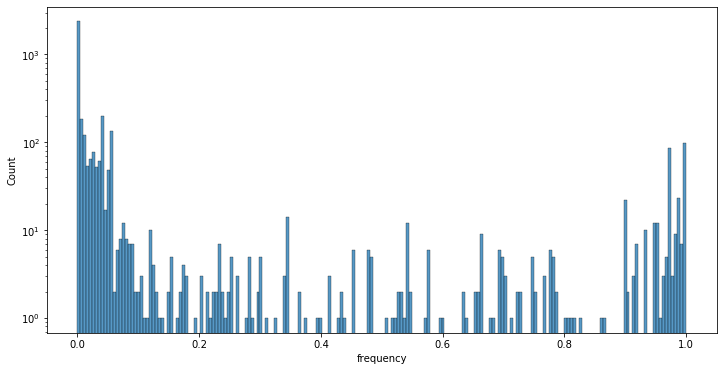

,column,udi,count,type,description,counts,frequency
0,0,eid,502543,Sequence,Encoded anonymised participant ID,9999,1.000000
4,4,31-0.0,502543,Categorical (single),SexUses data-coding 9 comprises 2 Integer-valu...,9999,1.000000
5,5,34-0.0,502543,Integer,Year of birth,9999,1.000000
6,6,35-0.0,501328,Categorical (single),Was blood sampling attemptedUses data-coding 7...,9978,0.997900
9,9,36-0.0,497907,Text,Blood pressure device ID,9907,0.990799
...,...,...,...,...,...,...,...
2718,2718,20117-0.0,501646,Categorical (single),Alcohol drinker statusUses data-coding 90 comp...,9969,0.997000
2734,2734,20160-0.0,499657,Categorical (single),Ever smokedUses data-coding 7 comprises 2 Inte...,9927,0.992799
2743,2743,21000-0.0,501645,Categorical (single),Ethnic backgroundUses data-coding 1001 compris...,9969,0.997000
2746,2746,21003-0.0,502543,Integer,Age when attended assessment centre,9999,1.000000


In [44]:
ukbb_index["counts"] = np.array(ukbb_data.count().tolist())
ukbb_index["frequency"] = ukbb_index["counts"] / len(ukbb_data)
display(ukbb_index.head(10))

fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(ukbb_index["frequency"], ax=ax)
ax.set_yscale("log")
plt.show()

display(ukbb_index.query("frequency > .99"))

In [70]:
# search descriptions

term = "smok"

found_indices = [i for (i, description) in enumerate(ukbb_index["description"].values) if term in description.lower()]
for i, row in ukbb_index.iloc[found_indices].query("type == 'Integer'").iterrows():
    print(row["description"])
    
ukbb_index.iloc[found_indices].query("type == 'Integer'")

Exposure to tobacco smoke at homeUses data-coding 100291 comprises 2 Integer-valued members in a simple list.
Exposure to tobacco smoke at homeUses data-coding 100291 comprises 2 Integer-valued members in a simple list.
Exposure to tobacco smoke at homeUses data-coding 100291 comprises 2 Integer-valued members in a simple list.
Exposure to tobacco smoke outside homeUses data-coding 100291 comprises 2 Integer-valued members in a simple list.
Exposure to tobacco smoke outside homeUses data-coding 100291 comprises 2 Integer-valued members in a simple list.
Exposure to tobacco smoke outside homeUses data-coding 100291 comprises 2 Integer-valued members in a simple list.
Age started smoking in former smokersUses data-coding 100291 comprises 2 Integer-valued members in a simple list.
Age started smoking in former smokersUses data-coding 100291 comprises 2 Integer-valued members in a simple list.
Age started smoking in former smokersUses data-coding 100291 comprises 2 Integer-valued members i

,column,udi,count,type,description,counts,frequency
382,382,1269-0.0,462808,Integer,Exposure to tobacco smoke at homeUses data-cod...,9197,0.919792
383,383,1269-1.0,19689,Integer,Exposure to tobacco smoke at homeUses data-cod...,398,0.039804
384,384,1269-2.0,28719,Integer,Exposure to tobacco smoke at homeUses data-cod...,565,0.056506
385,385,1279-0.0,462808,Integer,Exposure to tobacco smoke outside homeUses dat...,9197,0.919792
386,386,1279-1.0,19689,Integer,Exposure to tobacco smoke outside homeUses dat...,398,0.039804
387,387,1279-2.0,28719,Integer,Exposure to tobacco smoke outside homeUses dat...,565,0.056506
736,736,2867-0.0,120982,Integer,Age started smoking in former smokersUses data...,2349,0.234923
737,737,2867-1.0,5067,Integer,Age started smoking in former smokersUses data...,91,0.009101
738,738,2867-2.0,6825,Integer,Age started smoking in former smokersUses data...,125,0.012501
742,742,2887-0.0,115484,Integer,Number of cigarettes previously smoked dailyUs...,2248,0.224822


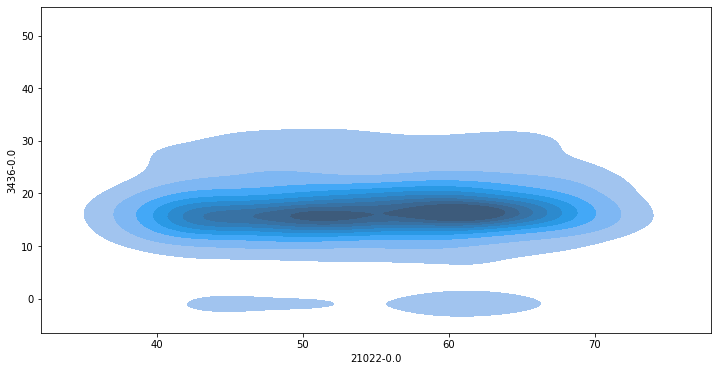

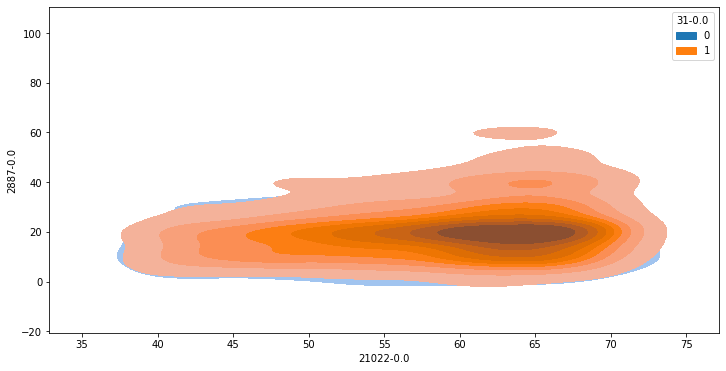

In [88]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=ukbb_data, y="3436-0.0", x="21022-0.0",  ax=ax, fill=True)
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=ukbb_data, y="2887-0.0", x="21022-0.0", hue="31-0.0", ax=ax, fill=True)

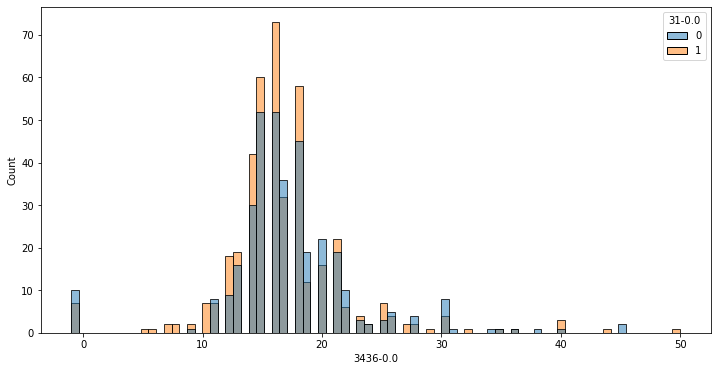

In [75]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=ukbb_data, x="3436-0.0", hue="31-0.0",  ax=ax)
# ax.set_xlim(-3, 5)

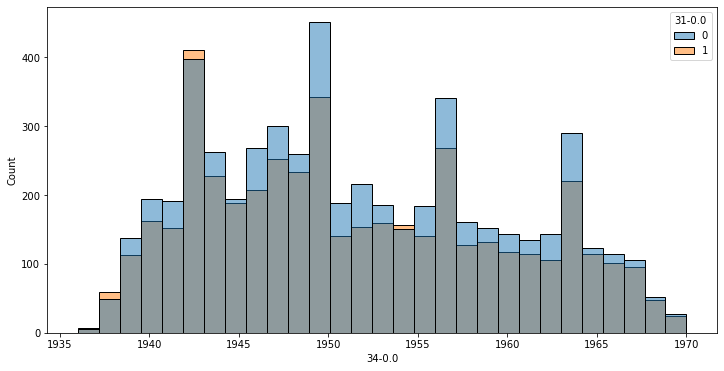

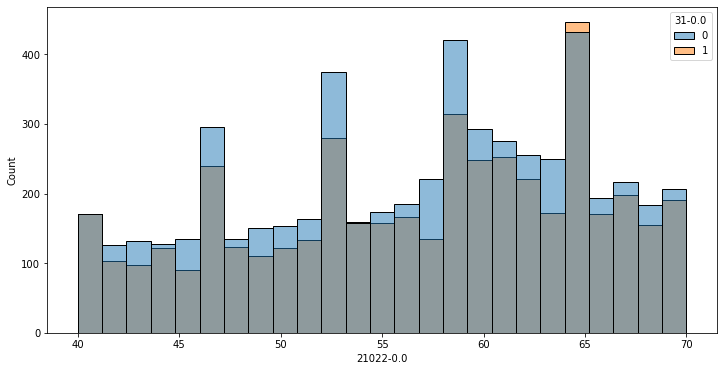

In [43]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=ukbb_data, x="34-0.0", hue="31-0.0",  ax=ax)
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=ukbb_data, x="21022-0.0", hue="31-0.0",  ax=ax)